# Processos Gaussianos

Nesta aula, exploraremos em detalhe os Processos Gaussianos, que representam uma extensão dos conceitos encontrados nas distribuições normais multivariadas. Para contextualizar, relembraremos nossa discussão anterior sobre algoritmos de agrupamento, na qual utilizamos a distribuição normal bivariada como modelo.

Comumente, referimo-nos a esses modelos como "não-paramétricos". Essa classificação deriva do fato de que, nos modelos não-paramétricos, a estrutura do modelo não é definida por um conjunto pré-fixado de parâmetros, mas sim por funções que possuem a capacidade de se adaptar de maneira mais flexível à quantidade e complexidade dos dados.

# Kernels (Funções de Covariância)

O kernel, ou função de covariância, é o componente central de um Processo Gaussiano. Ele determina a estrutura da covariância entre qualquer par de pontos no espaço de entrada, o que, por sua vez, influencia a forma e a suavidade da função aleatória gerada pelo processo. O kernel escolhido implica diretamente na capacidade do modelo de aprender e generalizar a partir dos dados fornecidos.

Os kernels desempenham um papel fundamental nos Processos Gaussianos; eles são responsáveis por modelar a relação entre as diferentes observações no espaço de entrada. Essa modelagem é crucial porque define como as informações são correlacionadas em função da distância entre os pontos de dados, ou seja, como uma observação influencia outra.

# Exponencial Quadrática

O Kernel Exponencial Quadrática, também conhecido como Kernel Gaussiano, é uma das funções de covariância mais comumente usadas em Processos Gaussianos. Este kernel é inspirado pela função densidade de probabilidade (PDF) da distribuição normal gaussiana, utilizando a distância quadrada entre os pontos para modelar a covariância. Esse kernel é dado por:

$k(x,x') = \sigma^2 exp\left[ - \frac{||x-x'||^2}{2l^2} \right]$

Onde $\sigma$ é um fator de ampliação que controla a variação geral dos valores na função modelada. Um maior valor de $\sigma$ resulta em uma maior variação vertical nos pontos de dados gerados pelo processo. O parâmetro $l$ é a escala de comprimento. Ele regula o grau de influência de um único ponto de treinamento sobre outros pontos. Valores menores de $l$ significam que a influência de um ponto diminui rapidamente com a distância.

- Pequenos valores de l: O modelo reage mais fortemente às variações locais entre os pontos de dados. Como resultado, o modelo pode captar detalhes finos, mas também pode se ajustar a ruídos aleatórios ("overfitting").
- Grandes valores de l: O modelo é mais suave e menos sensível às diferenças locais, podendo ignorar detalhes importantes em troca de uma maior generalização.

## Características

- **Suavidade**: Uma das principais características do Kernel Exponencial Quadrática é a suavidade das funções que ele produz, devido ao uso da distância quadrada nos cálculos. Isso resulta em previsões que são diferenciáveis múltiplas vezes, uma propriedade valiosa em muitos campos de aplicação.
  
- **Sensibilidade a Distâncias**: A influência de um ponto sobre outro diminui com o aumento da distância entre eles, o que é controlado pelo parâmetro de escala de comprimento \(l\). Isso permite que o kernel tenha uma flexibilidade considerável ao modelar relações espaciais ou temporais entre os dados.


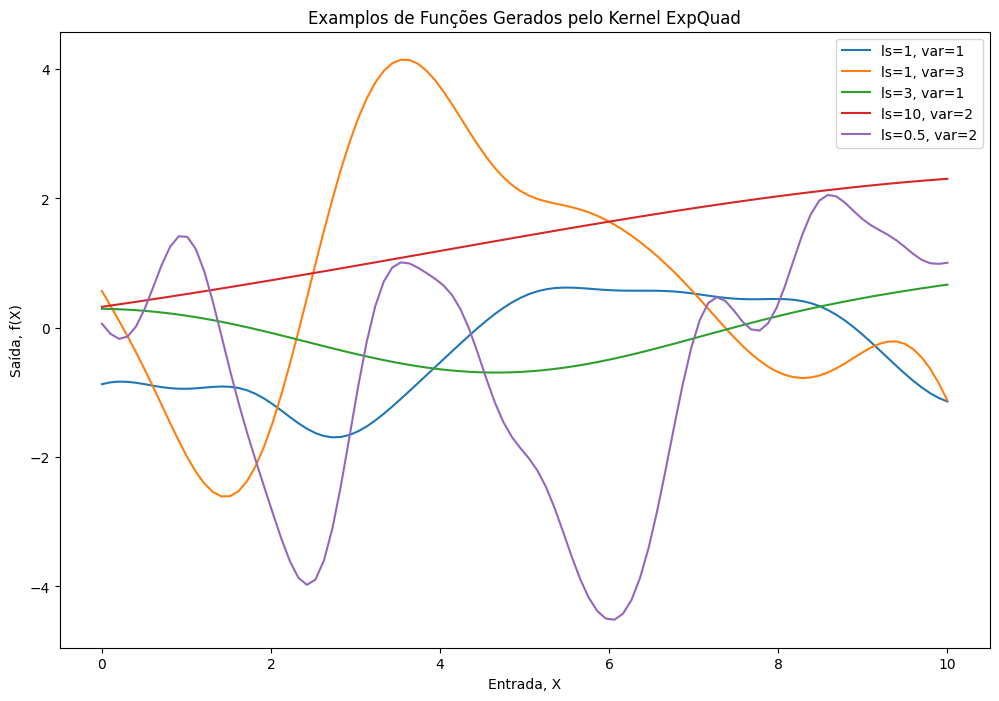

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

X = np.linspace(0, 10, 100)[:, None]

params = [
    (1, 1),   # ls=1,  var=1
    (1, 3),   # ls=1,  var=3
    (3, 1),   # ls=3,  var=1
    (10, 2),   # ls=10,  var=2
    (0.5, 2)  # ls=0.5, var=2
]

plt.figure(figsize=(12, 8))
for ls, var in params:

    cov = var*pm.gp.cov.ExpQuad(1, ls)

    K = cov(X).eval()
    #Media: m(x) = 0
    gp_samples = np.random.multivariate_normal(np.zeros(len(X)), K, 1)

    plt.plot(X.flatten(), gp_samples.flatten(), label=f'ls={ls}, var={var}')

plt.title('Examplos de Funções Gerados pelo Kernel ExpQuad')
plt.xlabel('Entrada, X')
plt.ylabel('Saída, f(X)')
plt.legend()
plt.show()


# Matérn 3/2

O Kernel Matérn 3/2 é uma das funções de covariância usadas em Processos Gaussianos que oferece uma alternativa ao Kernel Exponencial Quadrática com a capacidade de modelar funções mais irregulares e menos suaves. Este kernel é menos sensível à distância exata entre os pontos em comparação com o Kernel Gaussiano, proporcionando um comportamento mais realista em muitos cenários físicos.

A função do kernel Matérn 3/2 é expressa por:

$$
k(x, x') = \sigma^2 \left(1 + \frac{\sqrt{3} \|x-x'\|}{l}\right) \exp\left(-\frac{\sqrt{3} \|x-x'\|}{l}\right)
$$

onde:
- $\|x-x'\|$ é a distância Euclidiana entre os pontos $x$ e $x'$.
- $\sigma^2$ é o fator de escala que controla a variação geral dos valores da função.
- $l$ é a escala de comprimento que ajusta a sensibilidade do kernel à distância entre pontos.

## Características

- **Adaptabilidade**: Diferente do Kernel Exponencial Quadrática, o Matérn 3/2 permite ajustes na regularidade da função. É útil em situações onde a superfície da função tem irregularidades ou descontinuidades naturais.
- **Flexibilidade**: Pequenos valores de $l$ resultam em funções que reagem fortemente às variações locais, podendo captar detalhes finos mas também susceptíveis a overfitting. Grandes valores de $l$ suavizam a resposta do modelo, permitindo generalizar melhor sobre os dados, mas com menor sensibilidade a mudanças locais.


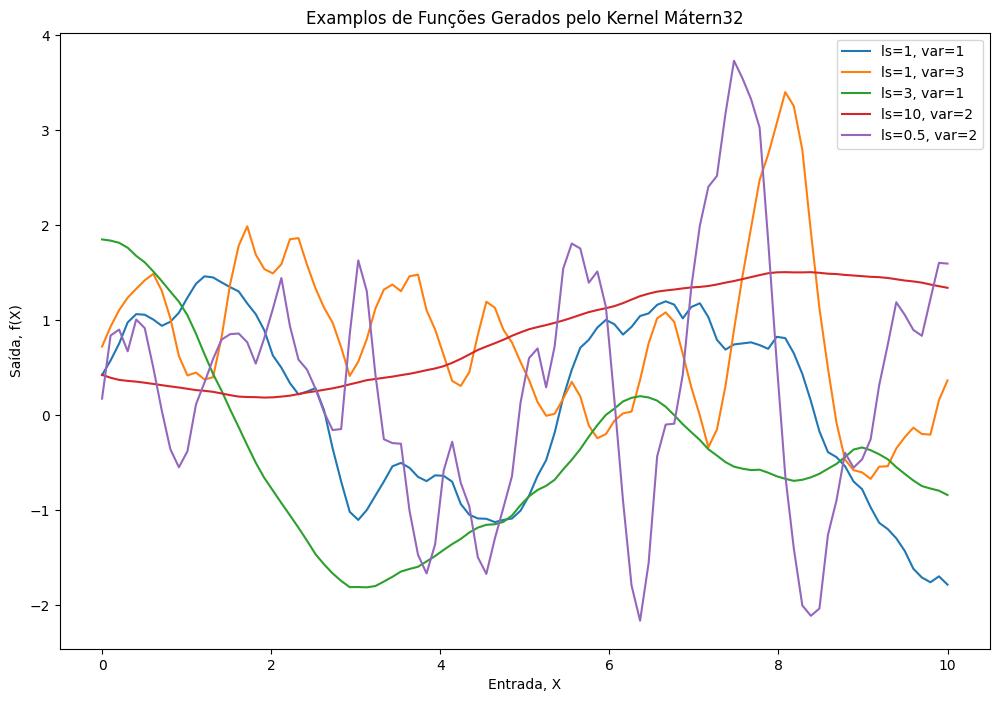

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

X = np.linspace(0, 10, 100)[:, None]

params = [
    (1, 1),   # ls=1,  var=1
    (1, 3),   # ls=1,  var=3
    (3, 1),   # ls=3,  var=1
    (10, 2),   # ls=10,  var=2
    (0.5, 2)  # ls=0.5, var=2
]

plt.figure(figsize=(12, 8))
for ls, var in params:

    cov = var*pm.gp.cov.Matern32(1, ls)

    K = cov(X).eval()
    #Media: m(x) = 0
    gp_samples = np.random.multivariate_normal(np.zeros(len(X)), K, 1)

    plt.plot(X.flatten(), gp_samples.flatten(), label=f'ls={ls}, var={var}')

plt.title('Examplos de Funções Gerados pelo Kernel Mátern32')
plt.xlabel('Entrada, X')
plt.ylabel('Saída, f(X)')
plt.legend()
plt.show()


# Cosine

O Kernel Cosine é uma função de covariância usada em Processos Gaussianos, especialmente útil em modelagem de periodicidades e ciclos repetitivos. Este kernel é ideal para analisar dados que exibem padrões de comportamento oscilatório ao longo do tempo.

A função do kernel Cosine é expressa por:

$$
k(x, x') = \sigma^2 \cos\left(\frac{\pi \|x-x'\|}{l}\right)
$$

onde:
- $\|x-x'\|$ é a distância Euclidiana entre os pontos $x$ e $x'$.
- $\sigma^2$ é o fator de escala que controla a amplitude das oscilações na função.
- $l$ é a escala de comprimento que ajusta a frequência das oscilações. Um valor menor de $l$ resulta em uma frequência mais alta das oscilações.

## Características

- **Periodicidade**: O Kernel Cosine é fundamental em aplicações onde os dados mostram clara periodicidade. A função coseno cria um padrão oscilatório que é natural para modelar fenômenos como ciclos sazonais ou ritmos biológicos.
- **Sensibilidade à Distância**: Semelhante a outros kernels, a escolha de $l$ influencia como rapidamente as propriedades oscilatórias diminuem com a distância. Pequenos valores de $l$ aumentam a frequência das oscilações, capturando variações rápidas nos dados.



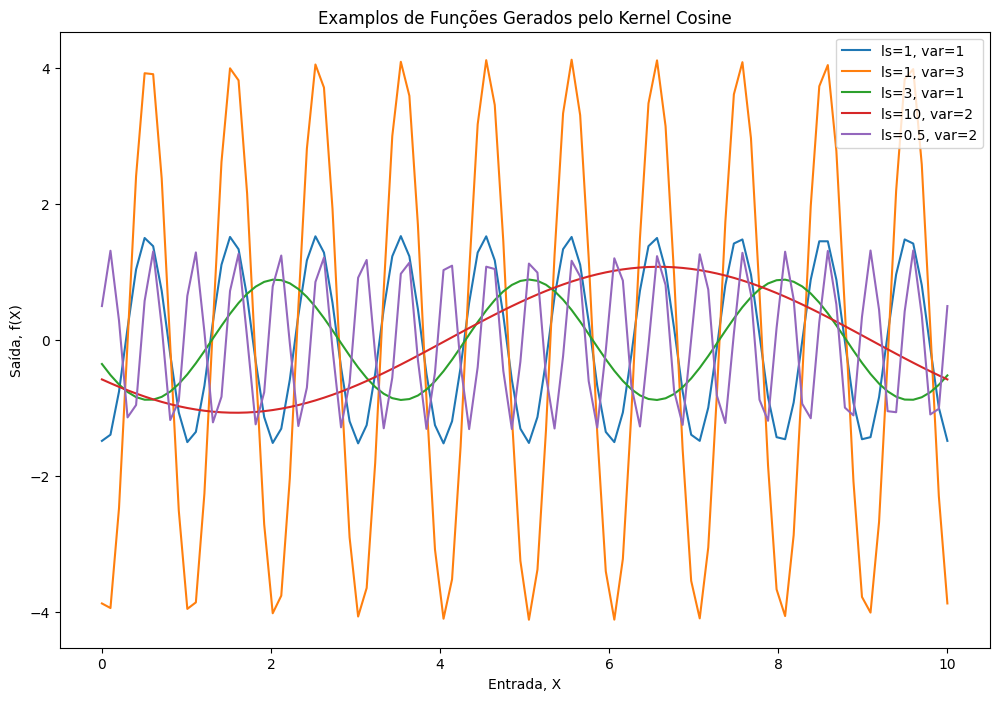

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

X = np.linspace(0, 10, 100)[:, None]

params = [
    (1, 1),   # ls=1,  var=1
    (1, 3),   # ls=1,  var=3
    (3, 1),   # ls=3,  var=1
    (10, 2),   # ls=10,  var=2
    (0.5, 2)  # ls=0.5, var=2
]

plt.figure(figsize=(12, 8))
for ls, var in params:

    cov = var*pm.gp.cov.Cosine(1, ls)

    K = cov(X).eval()
    #Media: m(x) = 0
    gp_samples = np.random.multivariate_normal(np.zeros(len(X)), K, 1)

    plt.plot(X.flatten(), gp_samples.flatten(), label=f'ls={ls}, var={var}')

plt.title('Examplos de Funções Gerados pelo Kernel Cosine')
plt.xlabel('Entrada, X')
plt.ylabel('Saída, f(X)')
plt.legend()
plt.show()


# Mean Functions (Funções de média)

As funções de média em Processos Gaussianos são essenciais para modelar como a média das amostras se comporta em função de diferentes leis de formação. Elas são cruciais para definir uma base ou tendência central sobre a qual as flutuações são modeladas pelas funções de covariância. Três tipos principais de funções de média são comumente utilizados:

- **Função Nula**: Esta função assume que a média das amostras é sempre zero. É útil quando os dados estão centrados e não há necessidade de ajustar uma tendência central variável.

- **Função Constante**: Esta função estabelece que a média será sempre uma constante $\mu$. É adequada para dados onde se espera uma deslocamento constante da média, mas sem uma tendência de aumento ou diminuição ao longo das observações.

- **Função Linear**: A função linear modela a média das amostras como uma relação linear com as variáveis de entrada. Ela é representada por:
  $$
  m(x) = ax + b
  $$
  onde a é a inclinação e b é o intercepto. Esta função é particularmente útil em cenários onde a média dos dados exibe uma tendência crescente ou decrescente clara, dependendo de uma ou mais variáveis independentes.


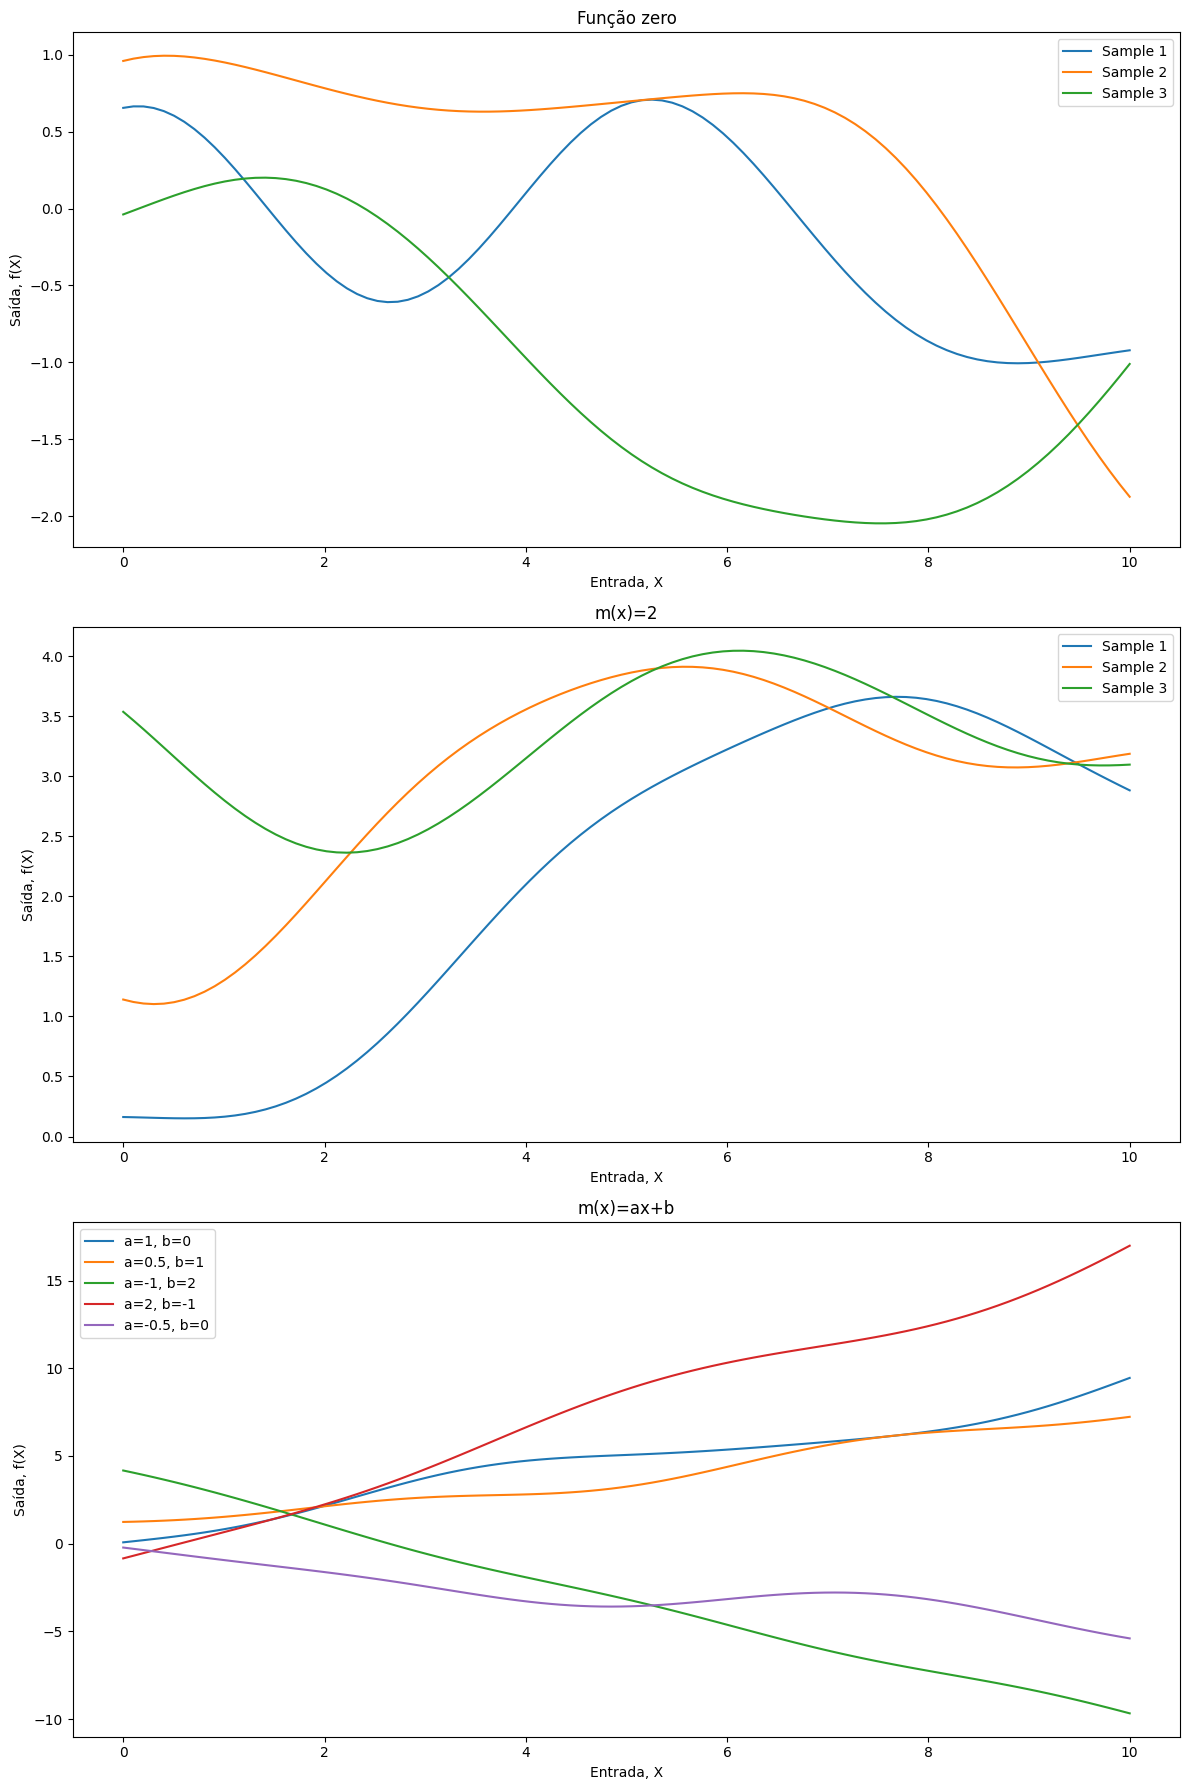

In [ ]:
X = np.linspace(0, 10, 100)[:, None]

ls, var = 2, 1  # lengthscale=2, variance=1

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

cov = var * pm.gp.cov.ExpQuad(1, ls)
K = cov(X).eval()
gp_samples = np.random.multivariate_normal(np.zeros(len(X)), K, 3)
for i in range(3):
    axes[0].plot(X.flatten(), gp_samples[i], label=f'Sample {i+1}')
axes[0].set_title('Função zero')
axes[0].set_xlabel('Entrada, X')
axes[0].set_ylabel('Saída, f(X)')
axes[0].legend()

mean_constant = 2 * np.ones(len(X))
gp_samples = np.random.multivariate_normal(mean_constant, K, 3)
for i in range(3):
    axes[1].plot(X.flatten(), gp_samples[i], label=f'Sample {i+1}')
axes[1].set_title('m(x)=2')
axes[1].set_xlabel('Entrada, X')
axes[1].set_ylabel('Saída, f(X)')
axes[1].legend()

linear_params = [(1, 0), (0.5, 1), (-1, 2), (2, -1), (-0.5, 0)]
for a, b in linear_params:
    mean_linear = a * X.flatten() + b
    gp_samples = np.random.multivariate_normal(mean_linear, K, 1)
    axes[2].plot(X.flatten(), gp_samples.flatten(), label=f'a={a}, b={b}')
axes[2].set_title('m(x)=ax+b')
axes[2].set_xlabel('Entrada, X')
axes[2].set_ylabel('Saída, f(X)')
axes[2].legend()

# Show all plots
plt.tight_layout()
plt.show()


# Utilizando um Processo Gaussiano para Modelagem

Quando se trabalha com um dataset no contexto de aprendizado de máquina ou estatística, frequentemente o objetivo é descobrir a função subjacente que explica ou prediz os valores alvo (targets) a partir das características observadas (features). Um Processo Gaussiano (GP) é uma técnica poderosa usada para modelar essa função desconhecida de maneira probabilística (Bayesiana).

## Definição do Modelo

A função do modelo, denotada por $f$, que queremos aprender, é assumida como sendo uma realização de um Processo Gaussiano. Isso é expresso matematicamente como:

$ f \sim GP(m(x), k(x, x')) $

onde:
- $m(x)$ é a função média que fornece uma predição básica do valor esperado de $f$ em qualquer ponto $x$.
- $k(x, x')$ é a função de covariância (ou kernel), que define como os valores de $f$ em diferentes pontos $x$ e $x'$ são correlacionados. O kernel escolhido tem um grande impacto sobre a suavidade, a periodicidade, entre outras características da função $f$ aprendida.


In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

In [5]:
y_obs = y["Concrete compressive strength"].values

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import pymc as pm
import matplotlib.pyplot as plt

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)


# GP Marginal

No PyMC, pm.gp.Marginal refere-se a uma classe que representa um Processo Gaussiano (GP) para situações de regressão marginal. Em termos mais simples, é uma maneira de especificar um modelo GP onde você está interessado apenas na distribuição marginal dos dados, isto é, você não precisa considerar todas as possíveis funções que se ajustam aos dados, mas sim a distribuição dos dados observados em si. Isso é particularmente útil quando você está lidando com a regressão baseada em GP e tem um grande conjunto de dados, pois permite que você evite o cálculo completo da distribuição conjunta, que
 pode ser computacionalmente caro.

**Predições em Novos Pontos:** Ao contrário da verossimilhança marginal, que é sobre ajustar o modelo, conditional é sobre fazer predições. Utiliza-se a informação da função de covariância e da função média, juntamente com os parâmetros aprendidos durante o treinamento, para estimar os valores de saída em novos pontos de entrada.



In [ ]:
with pm.Model() as gp_model:

    ρ = pm.HalfCauchy('ρ', 1)
    η = pm.HalfCauchy('η', 1)

    M = pm.gp.mean.Zero()
    K = (η**2) * pm.gp.cov.ExpQuad(1, ρ)

    σ = pm.HalfNormal('σ', 1)

    gp_comp = pm.gp.Marginal(mean_func=M, cov_func=K)
    gp_comp.marginal_likelihood('target', X=X_pca,
                           y=y_obs, noise=σ)

/usr/local/lib/python3.10/dist-packages/pymc/gp/gp.py:56: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)


In [ ]:
with gp_model:
  trace = pm.find_MAP()

In [ ]:
X_pca.reshape(-1, 1)

array([[ 284.79363069],
       [ 284.65724499],
       [ 101.8438476 ],
       ...,
       [-152.62382257],
       [-132.38724401],
       [ -29.20471581]])

In [ ]:
trace

{'ρ_log__': array(6.29689446),
 'η_log__': array(3.21853258),
 'σ_log__': array(2.62064208),
 'ρ': array(542.88334221),
 'η': array(24.99142033),
 'σ': array(13.74454581)}

In [ ]:
with gp_model:
    t_preds = gp_comp.conditional("t_preds",X_pca.reshape(-1, 1))
    sample = pm.sample_posterior_predictive([trace],var_names=["t_preds"])

In [ ]:
df = pd.DataFrame({
    'X_pca': X_pca.flatten(),
    'y_obs': y_obs
})
df

,X_pca,y_obs
0,284.793631,79.99
1,284.657245,61.89
2,101.843848,40.27
3,111.188675,41.05
4,-57.181489,44.30
...,...,...
1025,-23.697484,44.28
1026,33.290178,31.18
1027,-152.623823,23.70
1028,-132.387244,32.77


In [ ]:
yy = sample.posterior_predictive
yy

<xarray.Dataset>
Dimensions:        (chain: 1, draw: 1, t_preds_dim_2: 1030)
Coordinates:
  * chain          (chain) int64 0
  * draw           (draw) int64 0
  * t_preds_dim_2  (t_preds_dim_2) int64 0 1 2 3 4 ... 1025 1026 1027 1028 1029
Data variables:
    t_preds        (chain, draw, t_preds_dim_2) float64 51.96 51.95 ... 33.98
Attributes:
    created_at:                 2024-04-23T22:24:47.391089
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.10.4

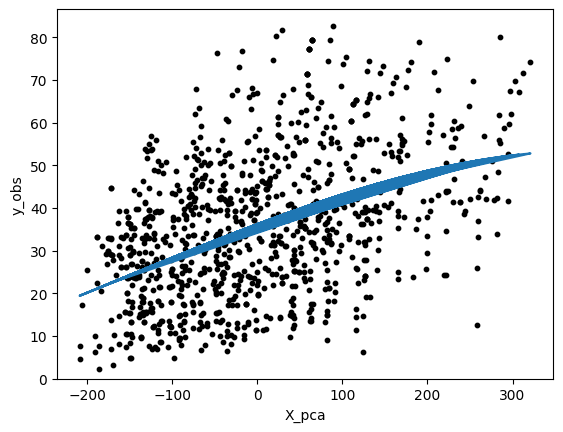

In [ ]:
ax = df.plot.scatter(x='X_pca', y='y_obs', c='k', s=10)
ax.set_ylim(0, None)
for x in yy['t_preds']:
    ax.plot(X_pca, x[0])

In [ ]:
res=yy["t_preds"].sel(chain=0,draw=0).values.reshape(-1,1)
res

array([[51.95831506],
       [51.95397364],
       [43.30937734],
       ...,
       [24.05500928],
       [25.71754204],
       [33.98275844]])

In [ ]:
sum(abs(yy["t_preds"][0][0].values-y_obs))

12659.097031339854

In [24]:
print(X_pca.min())
print(X_pca.max())

-208.84031149502513
321.1277674993042


In [17]:
with pm.Model() as gp_model_2:

    ρ = pm.HalfCauchy('ρ', 1)
    η = pm.HalfCauchy('η', 1)

    M = pm.gp.mean.Zero()
    K = (η**2) * pm.gp.cov.ExpQuad(1, ρ)
    Xu = pm.gp.util.kmeans_inducing_points(10, X_pca)
    σ = pm.HalfNormal('σ', 1)

    gp_comp = pm.gp.MarginalApprox(mean_func=M, cov_func=K)
    gp_comp.marginal_likelihood('target', X=X_pca,
                           y=y_obs, Xu=Xu, noise=σ)

/usr/local/lib/python3.10/dist-packages/pymc/gp/gp.py:56: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)


In [18]:
with gp_model_2:
  trace = pm.sample()

In [11]:
pm.summary(trace)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ρ,824.299,582.772,228.585,1632.661,20.683,14.630,817.0,677.0,1.0
η,45.602,34.223,14.292,94.276,1.229,0.870,918.0,688.0,1.0
σ,13.761,0.279,13.241,14.281,0.008,0.005,1302.0,1222.0,1.0


In [51]:
X_pred = np.linspace(-209, 322)

with gp_model_2:
  t_preds = gp_comp.conditional("t_preds3",X_pred.reshape(-1,1))
  sample = pm.sample_posterior_predictive(trace,var_names=["t_preds3"],predictions=True)

<ipython-input-51-1d3235ce469e>:5: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  sample = pm.sample_posterior_predictive(trace,var_names=["t_preds3"],predictions=True)


In [82]:
y_preds = sample.predictions["t_preds3"].values
y_preds.mean(axis=1)

array([[21.18076804, 21.97380996, 22.76753117, 23.56145777, 24.35513496,
        25.14815313, 25.94026901, 26.73083097, 27.51954973, 28.30602665,
        29.09003689, 29.87105428, 30.64870938, 31.42265019, 32.19248412,
        32.95794583, 33.71862602, 34.47400756, 35.22396582, 35.96804926,
        36.70575252, 37.43704978, 38.16141128, 38.87835692, 39.58772466,
        40.28920057, 40.98249185, 41.66712057, 42.34282947, 43.00939212,
        43.66634306, 44.31347043, 44.95051265, 45.57697658, 46.19257787,
        46.79726645, 47.39047227, 47.97204246, 48.54165641, 49.09906374,
        49.64397113, 50.17605437, 50.69494973, 51.20050345, 51.6922    ,
        52.16991069, 52.63308499, 53.08156997, 53.5147757 , 53.93240918],
       [21.15894547, 21.95547307, 22.75270741, 23.54993839, 24.34693032,
        25.1432334 , 25.9384056 , 26.73208728, 27.52377593, 28.3130137 ,
        29.09953544, 29.88290478, 30.66272547, 31.43862505, 32.21017637,
        32.97701392, 33.73872579, 34.49506586, 35.

<Axes: >

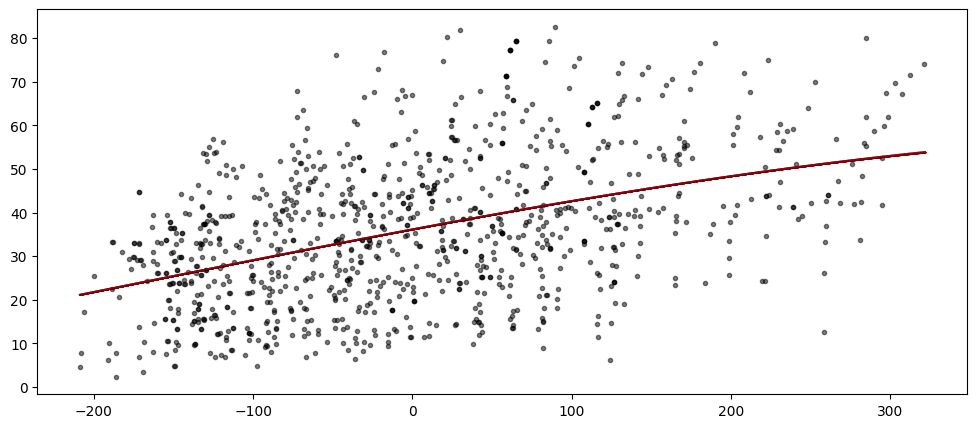

In [83]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
plt.plot(X_pca, y_obs, 'ok', ms=3, alpha=0.5, label="Observado");
from pymc.gp.util import plot_gp_dist
plot_gp_dist(ax, y_preds.mean(axis=1), X_pred)

# Exercício

1) Implemente o modelo de processo Gaussiano para o dataset do simulado. Use outras funções de média e covariância.